Here, we print out the 25 most common words that occur in the texts. For sake of simplicity, we are only sifting through NarrativeCME. We may look into using NarrativeLE later.

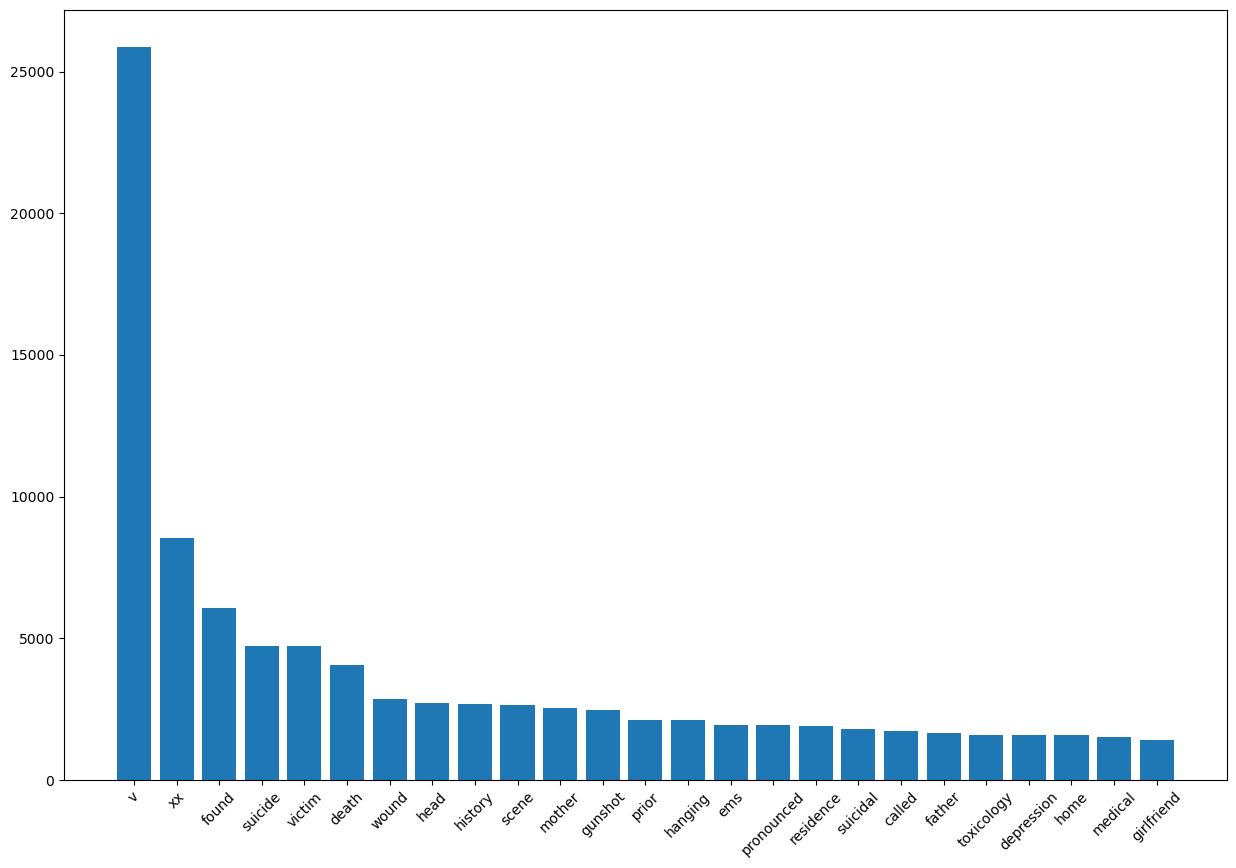

In [8]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the CSV file
df = pd.read_csv('data/train_features.csv')

# Assuming 'text' is the column with the text data
text = " ".join(df['NarrativeCME'].astype(str))

# Tokenization
tokens = word_tokenize(text)

# Convert to lowercase
tokens = [w.lower() for w in tokens]

# Remove punctuation and non-alphabetic tokens
tokens = [word for word in tokens if word.isalpha()]

# Filter out stop words
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

# Frequency distribution
freq_dist = nltk.FreqDist(tokens)

# Most common words
most_common = freq_dist.most_common(25)

# Visualization
words = [word[0] for word in most_common]
counts = [word[1] for word in most_common]
plt.figure(figsize=(15,10))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.show()

"v", "xx", "victim", "prior", "ems" are excluded as the trigrams associated with these words are not particularly useful related to standard variables.

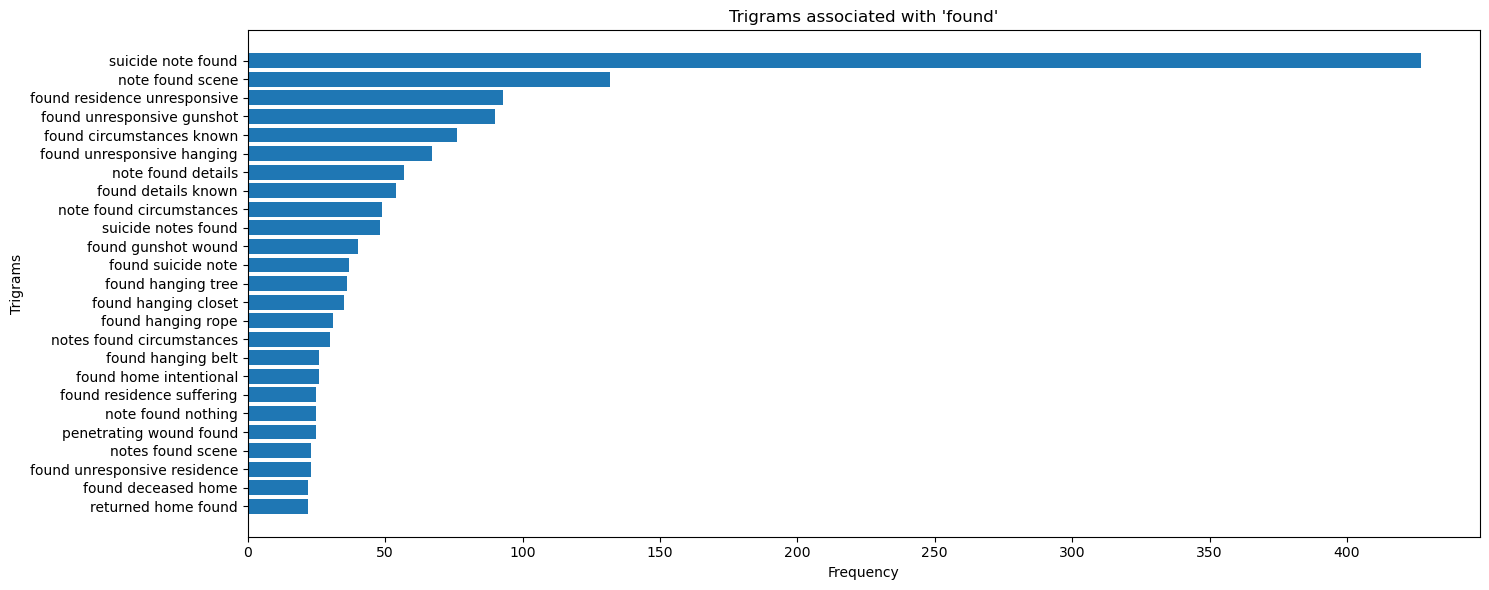

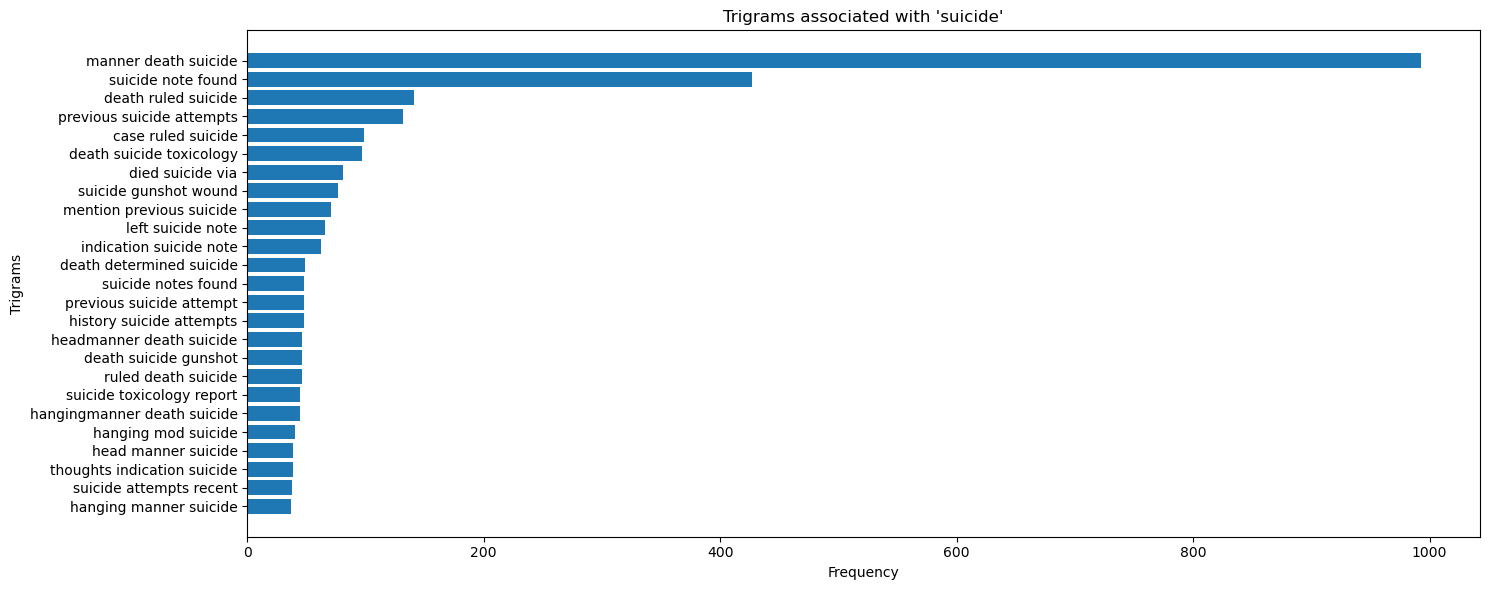

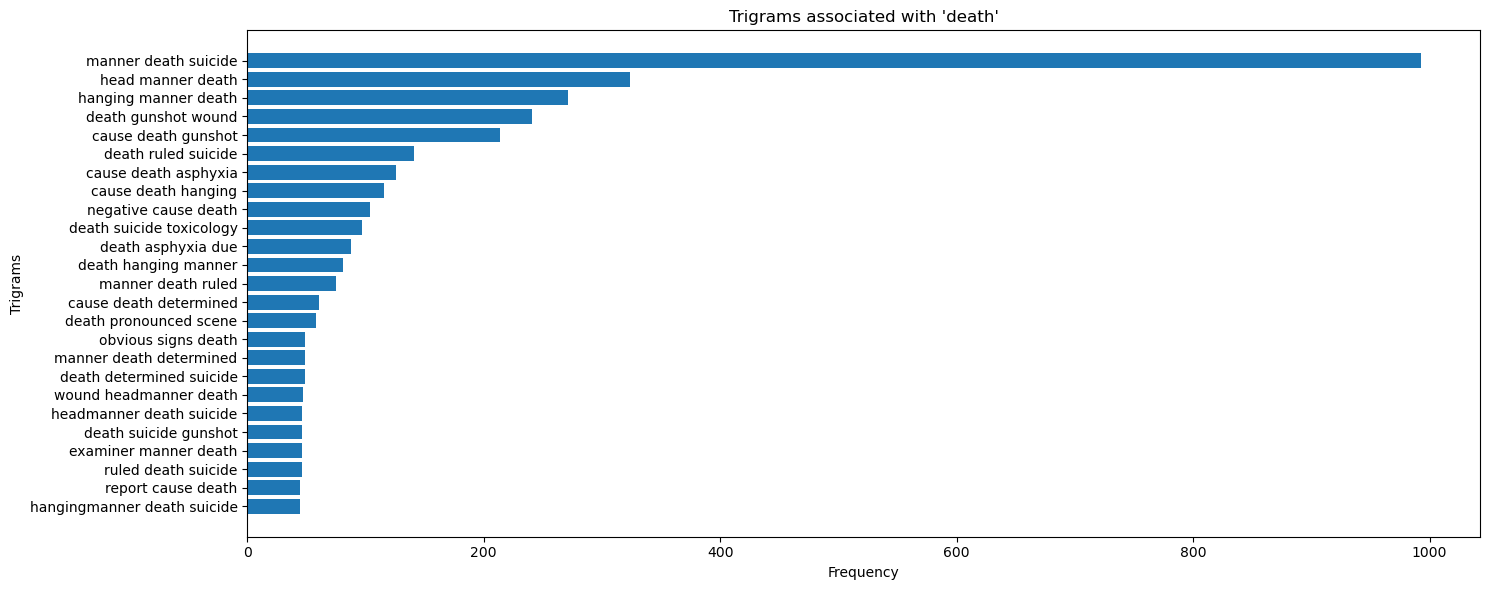

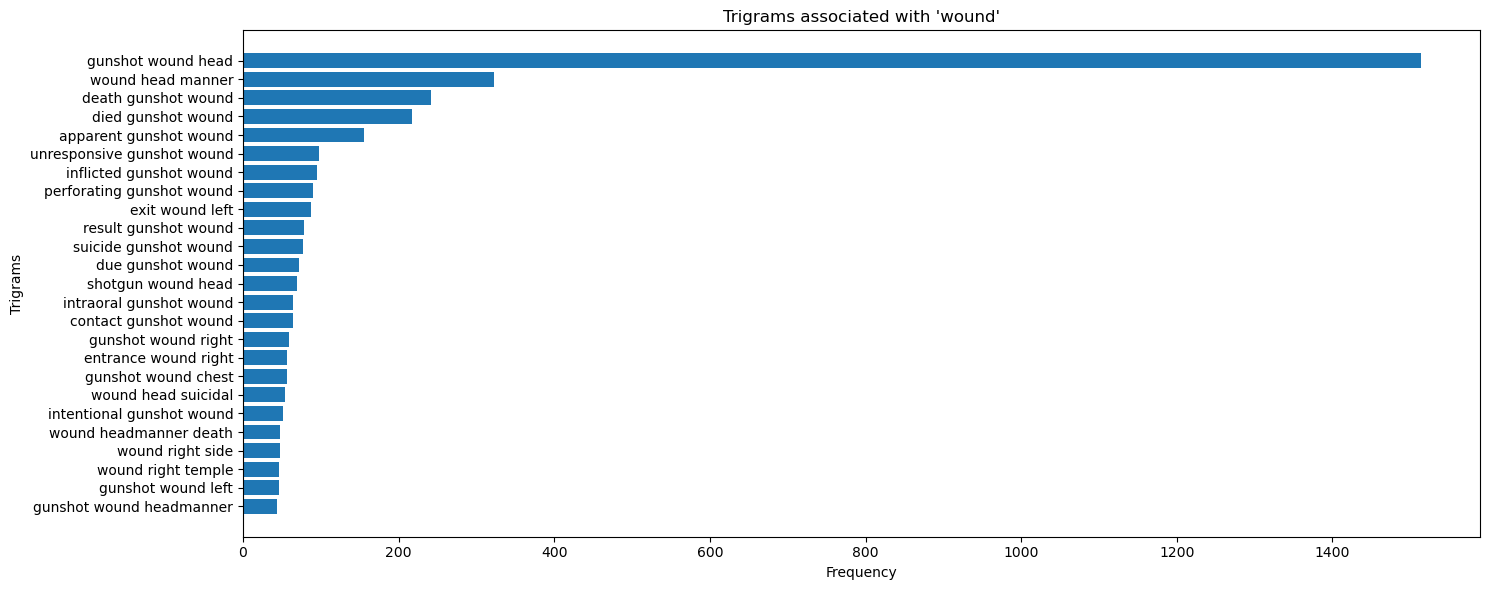

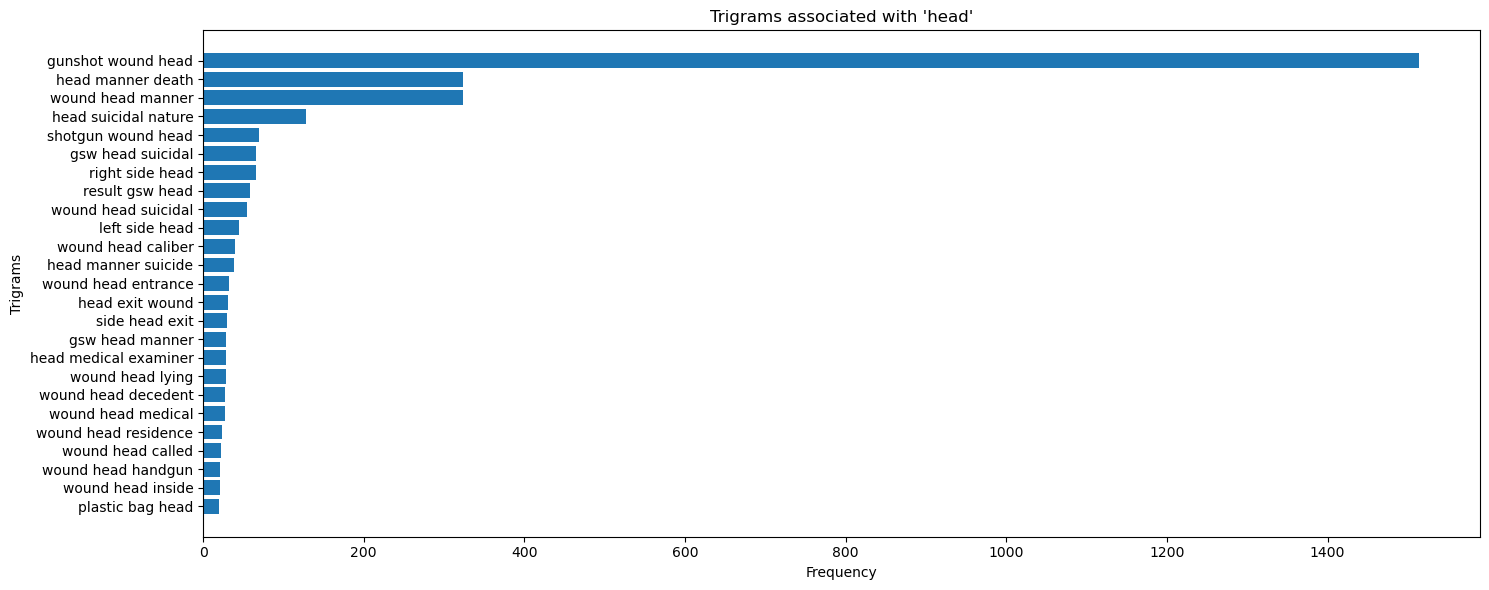

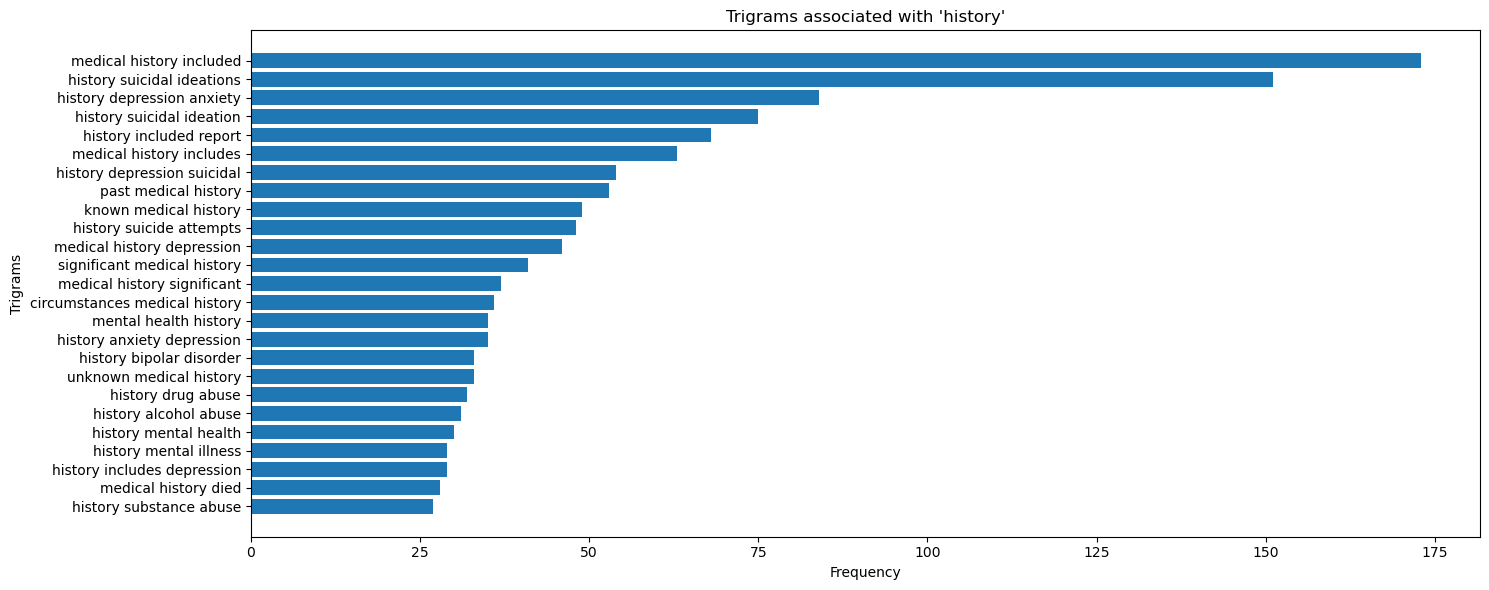

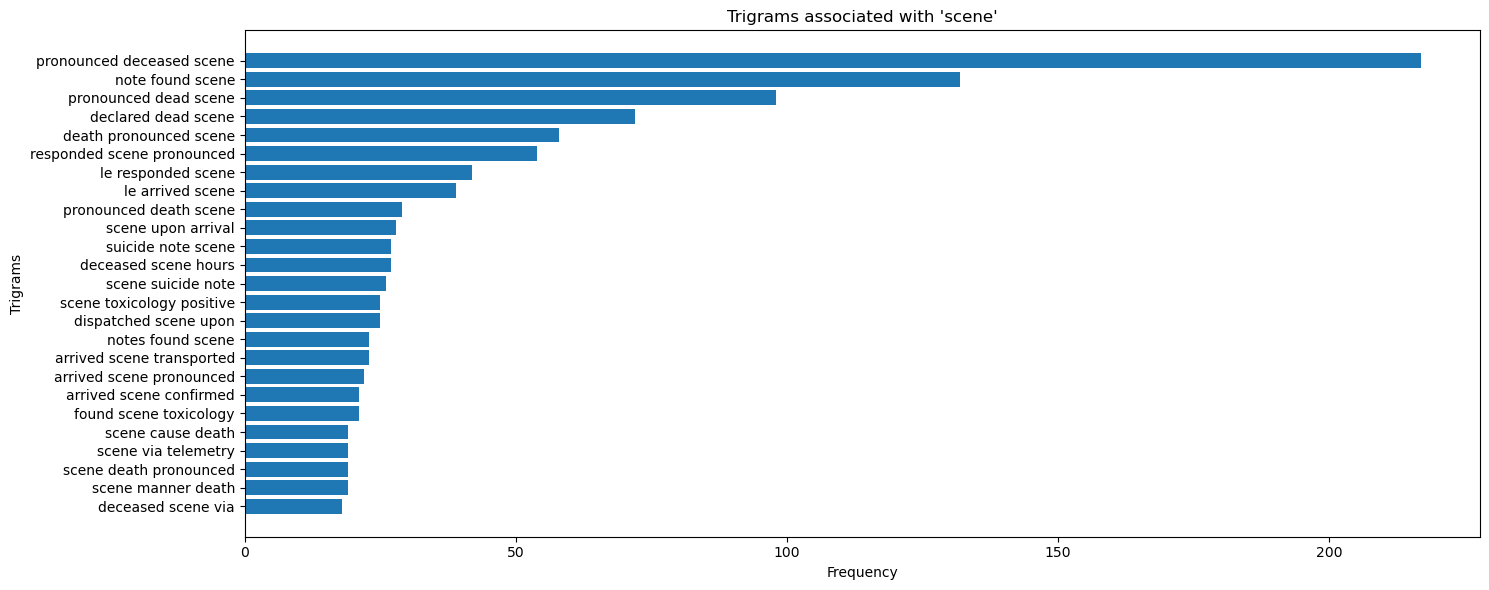

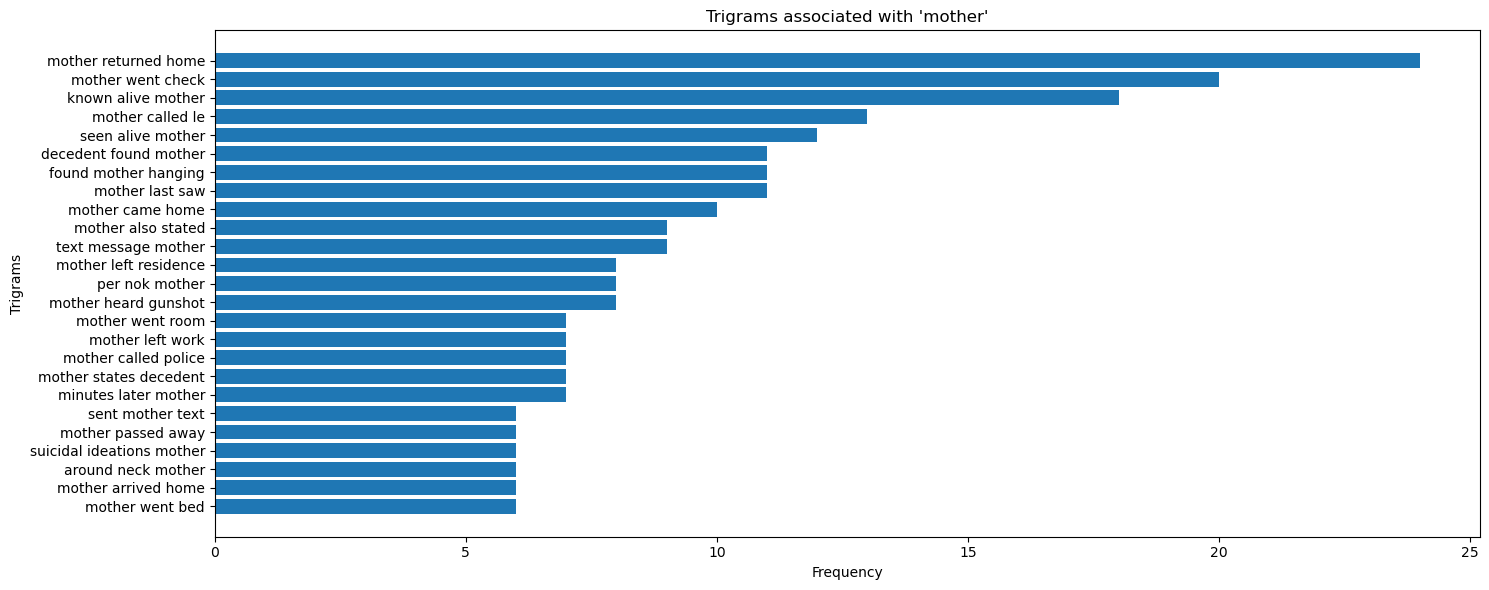

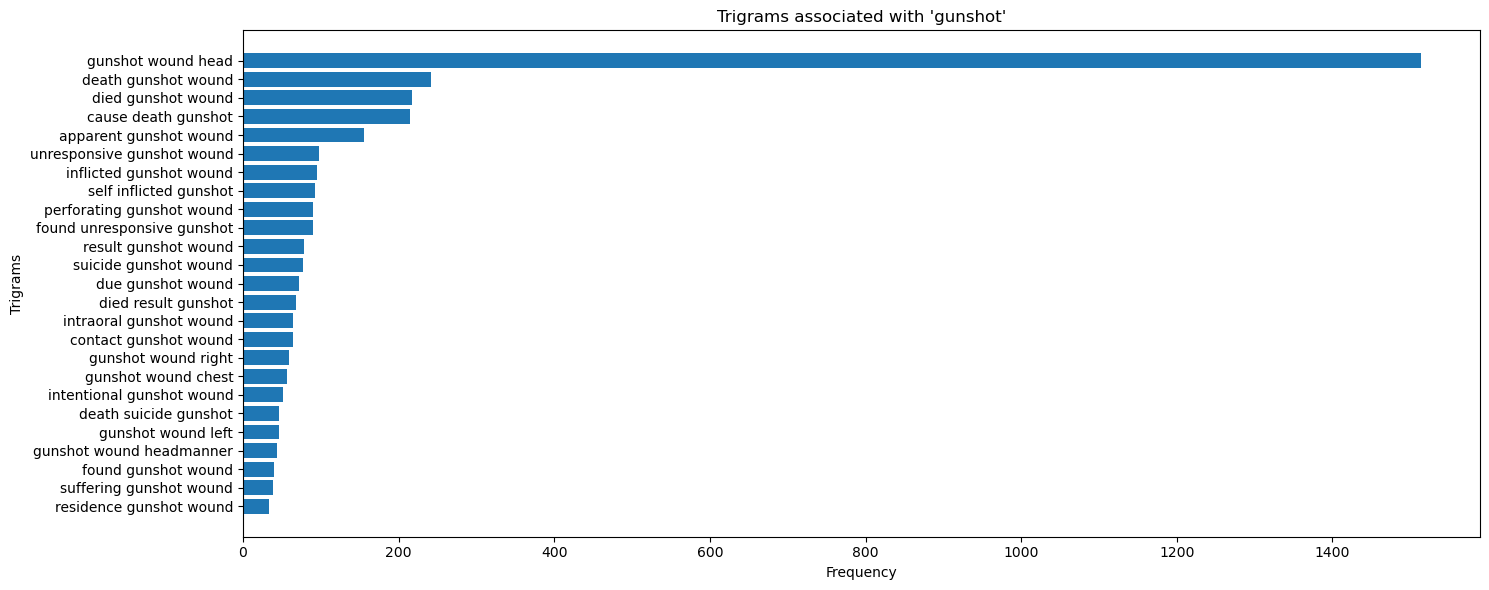

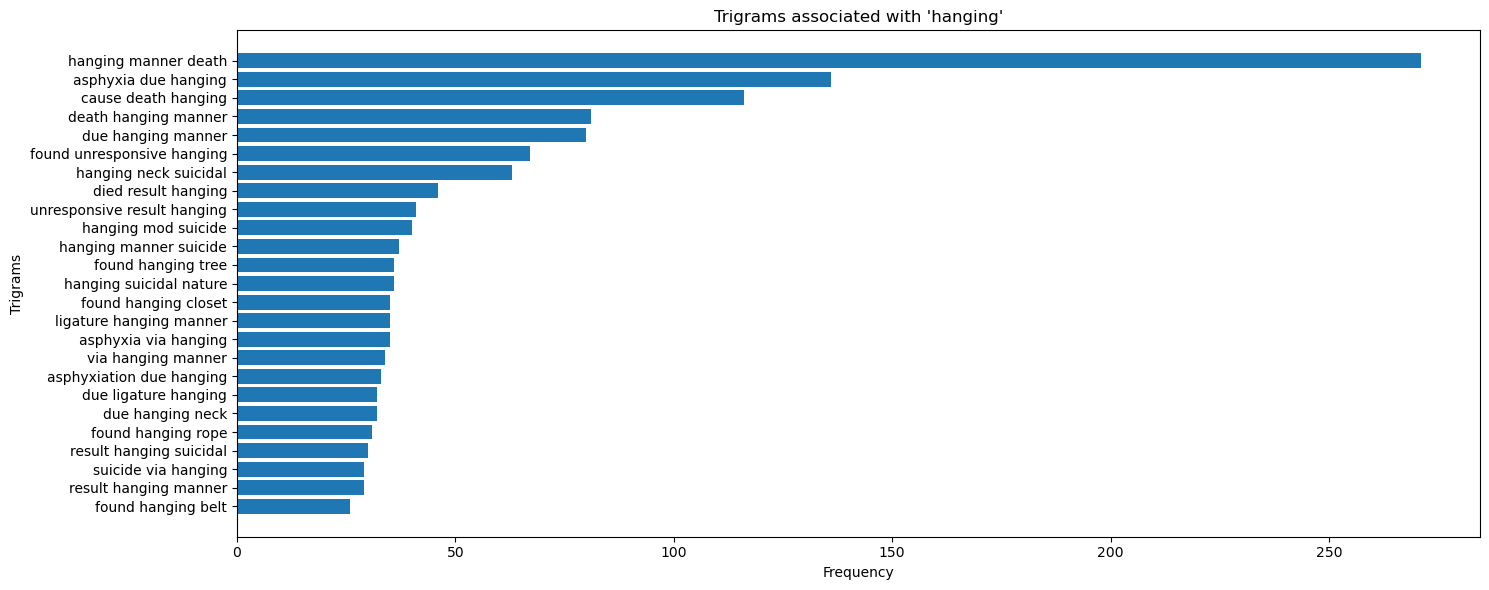

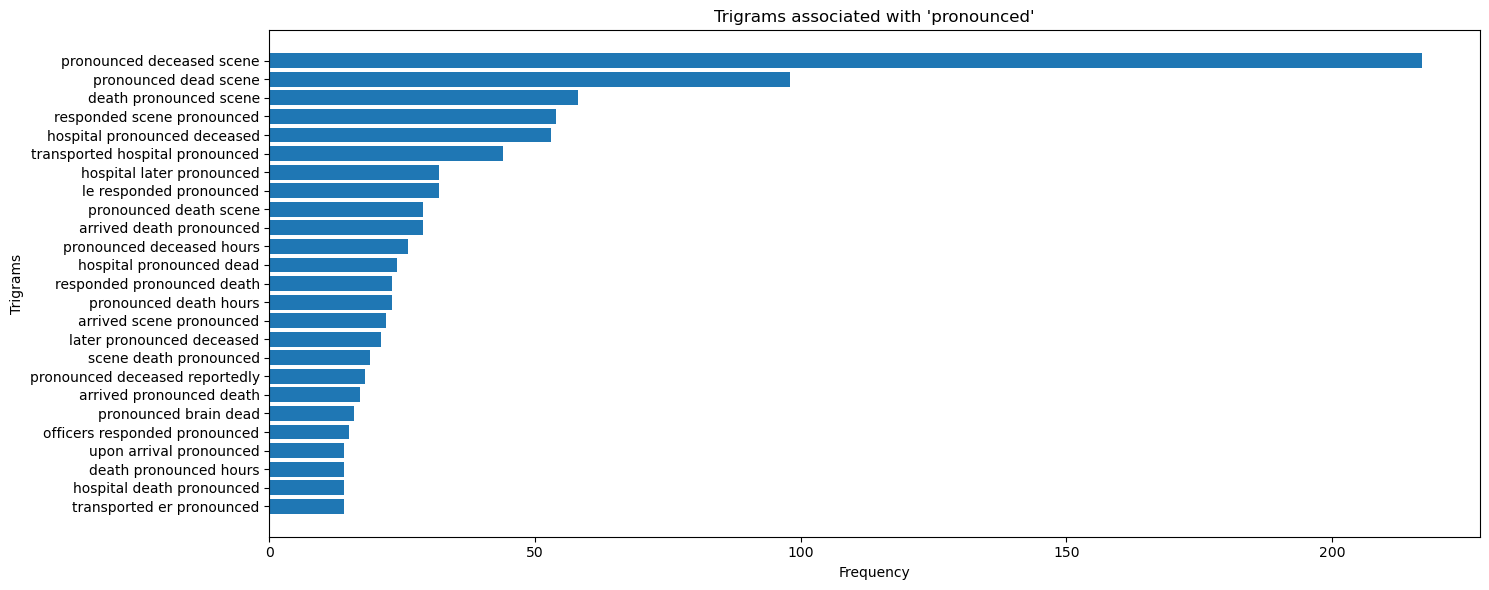

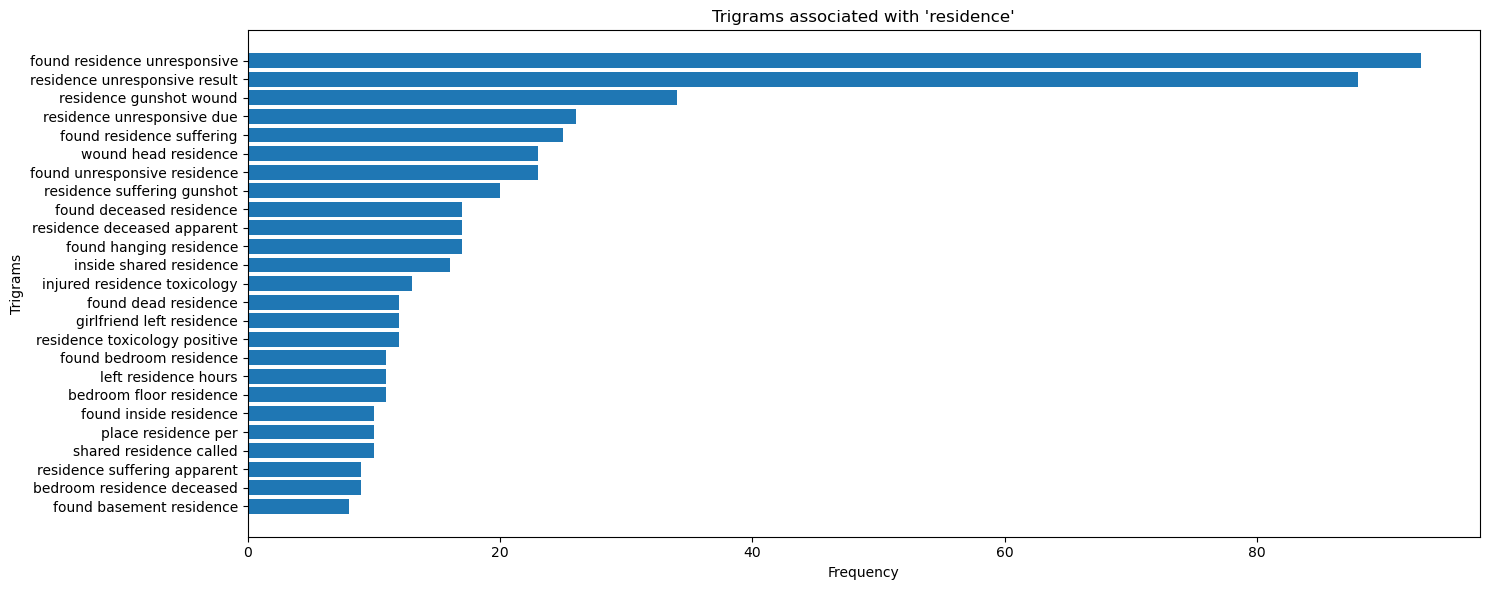

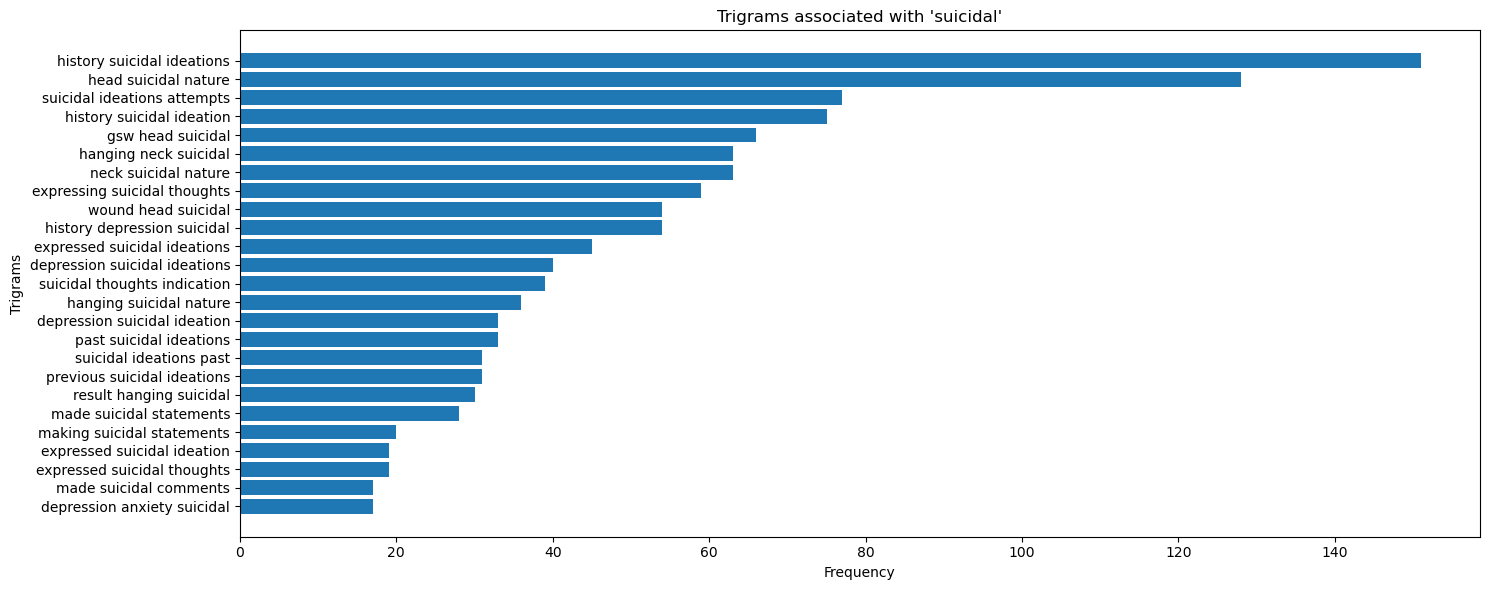

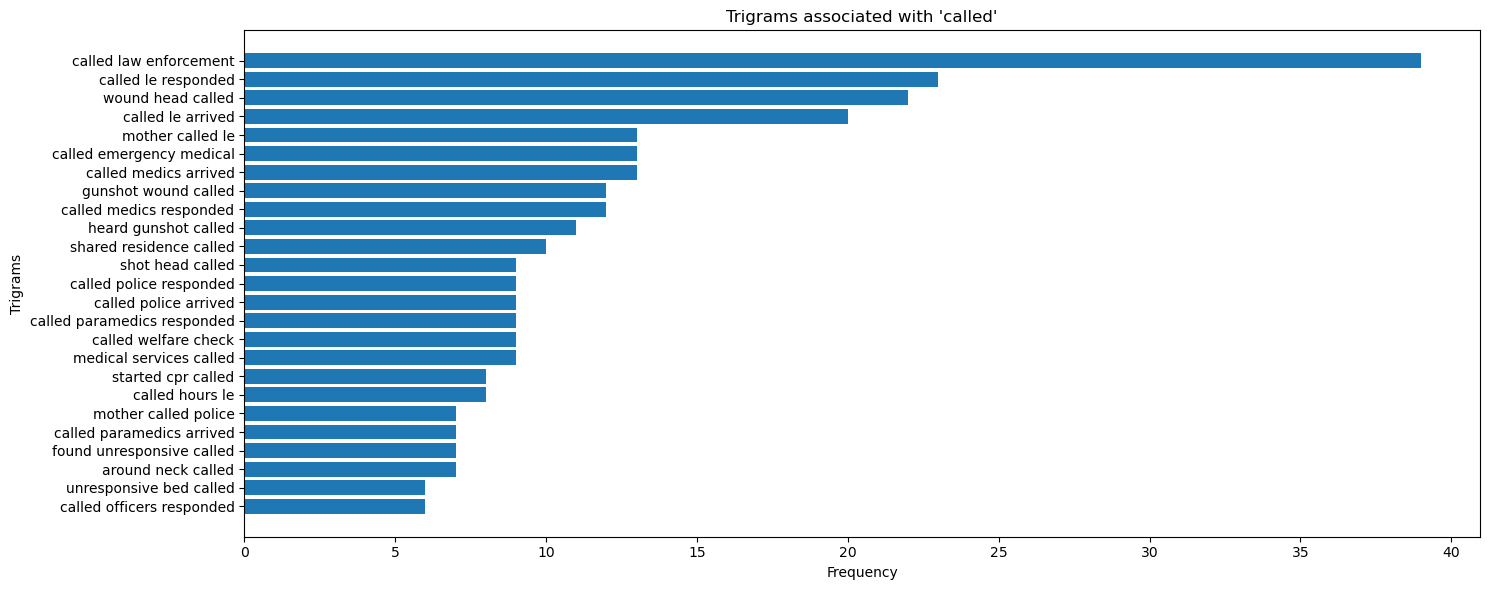

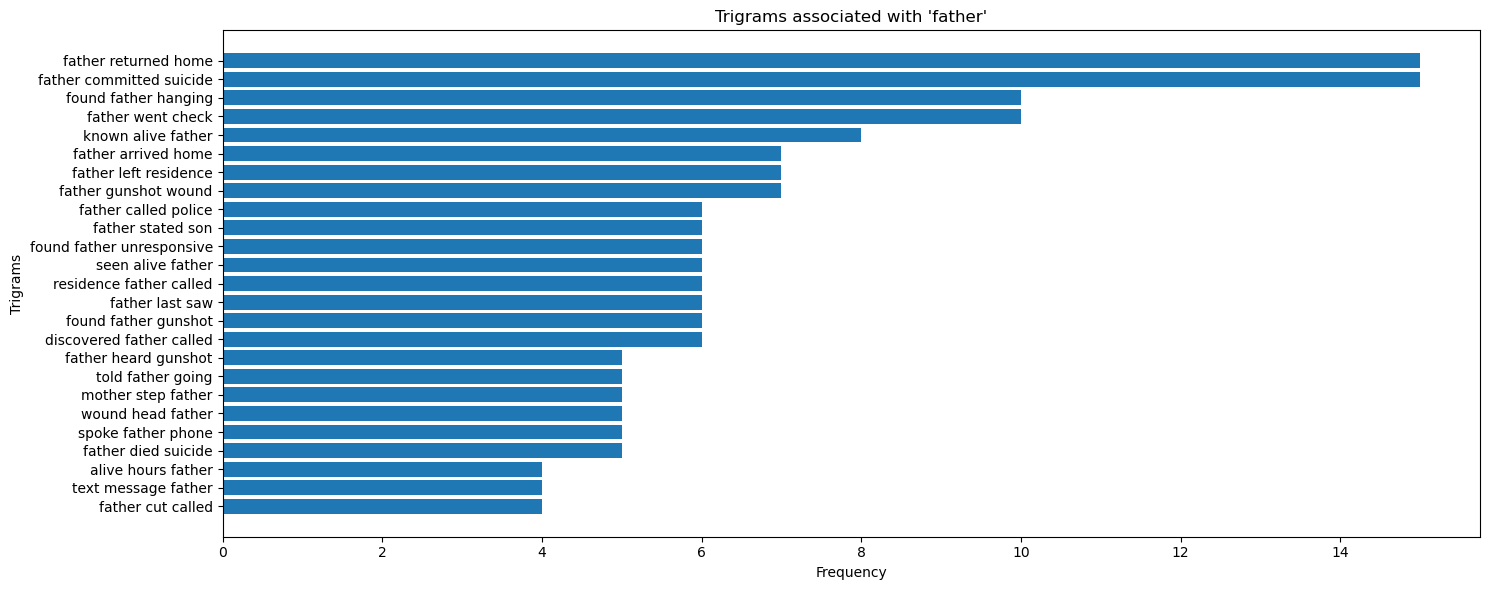

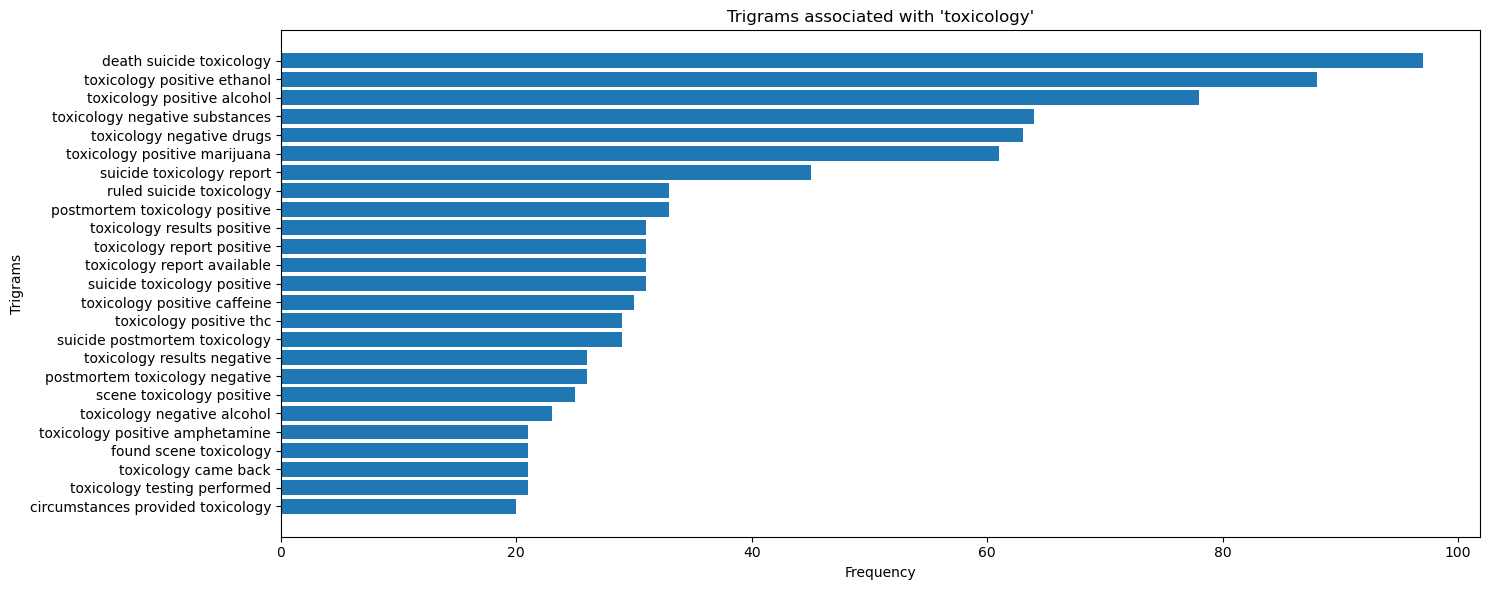

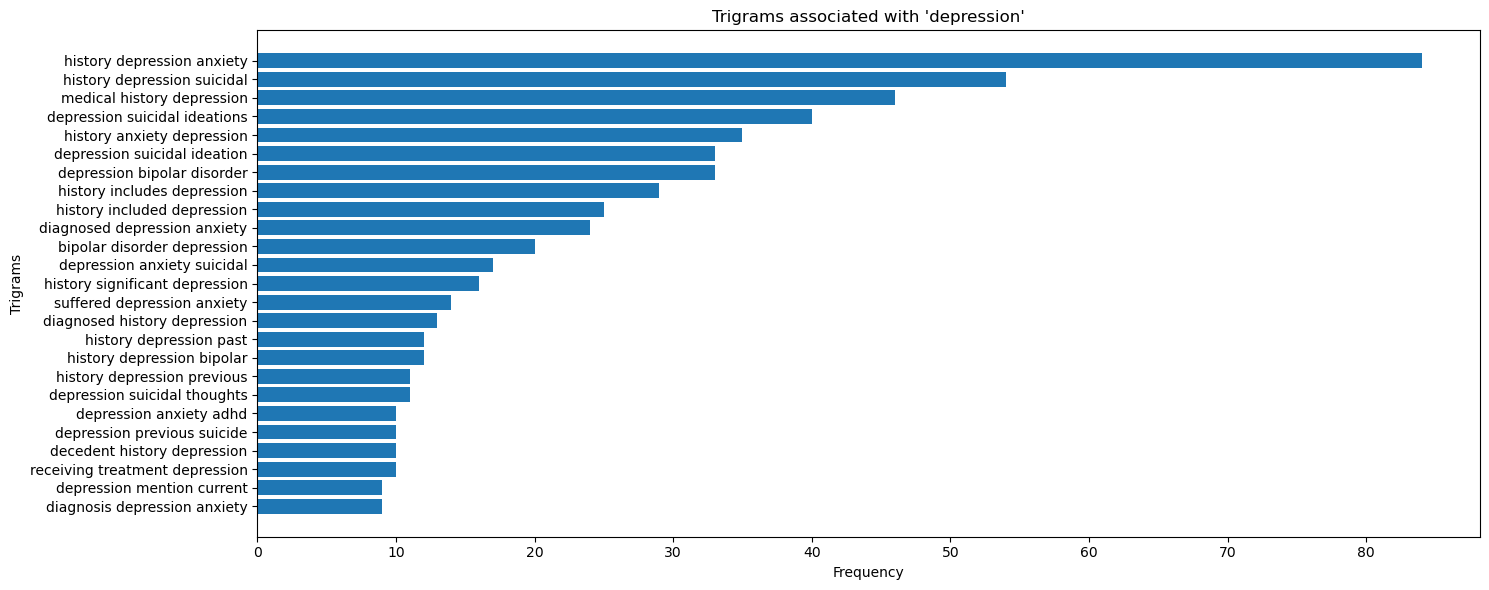

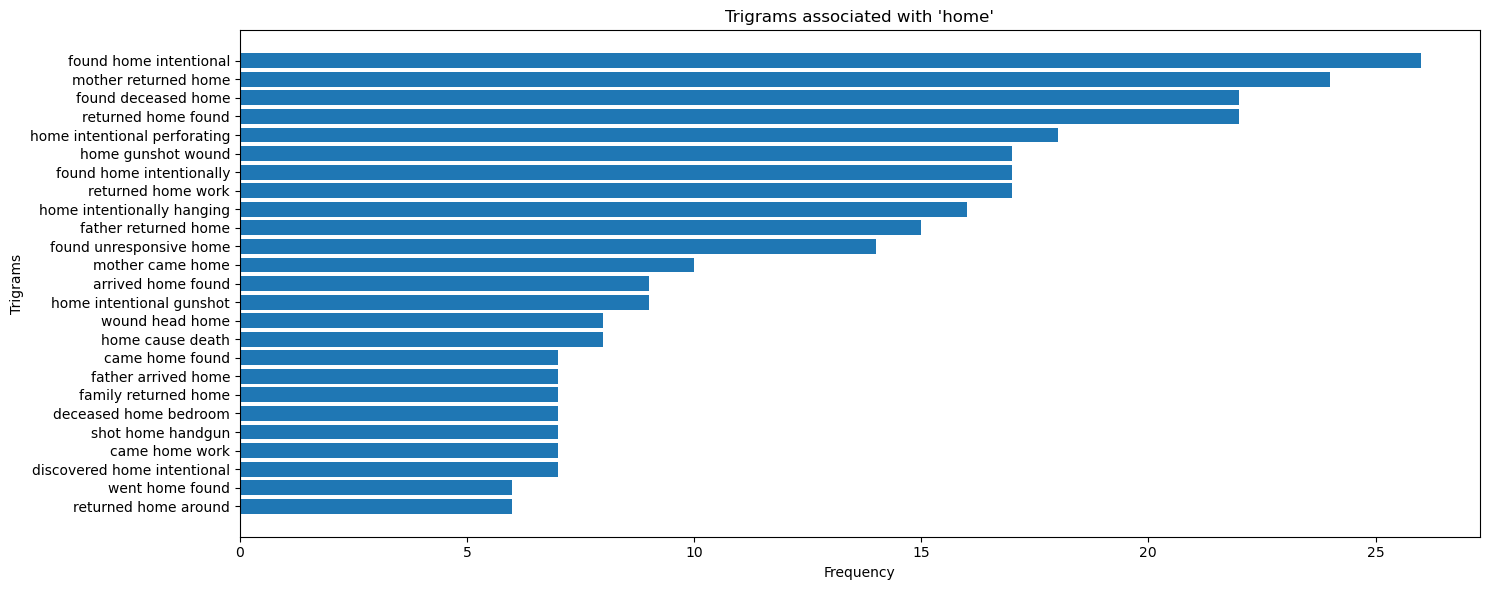

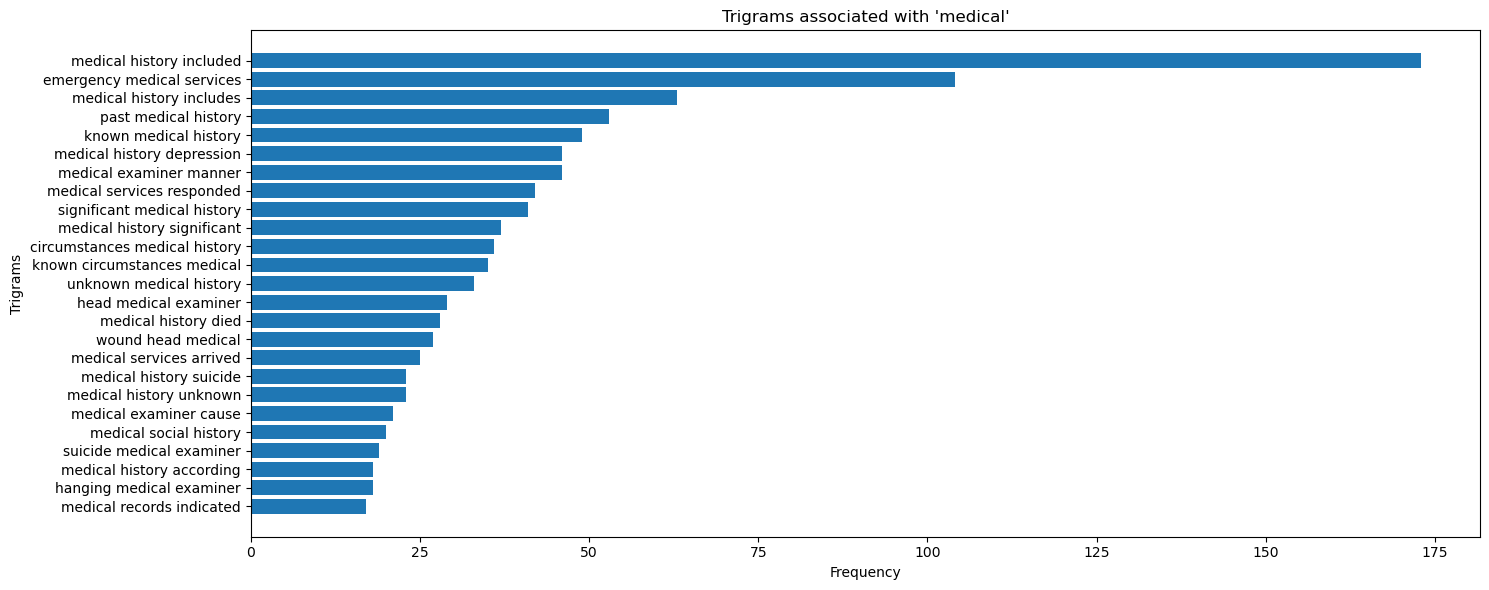

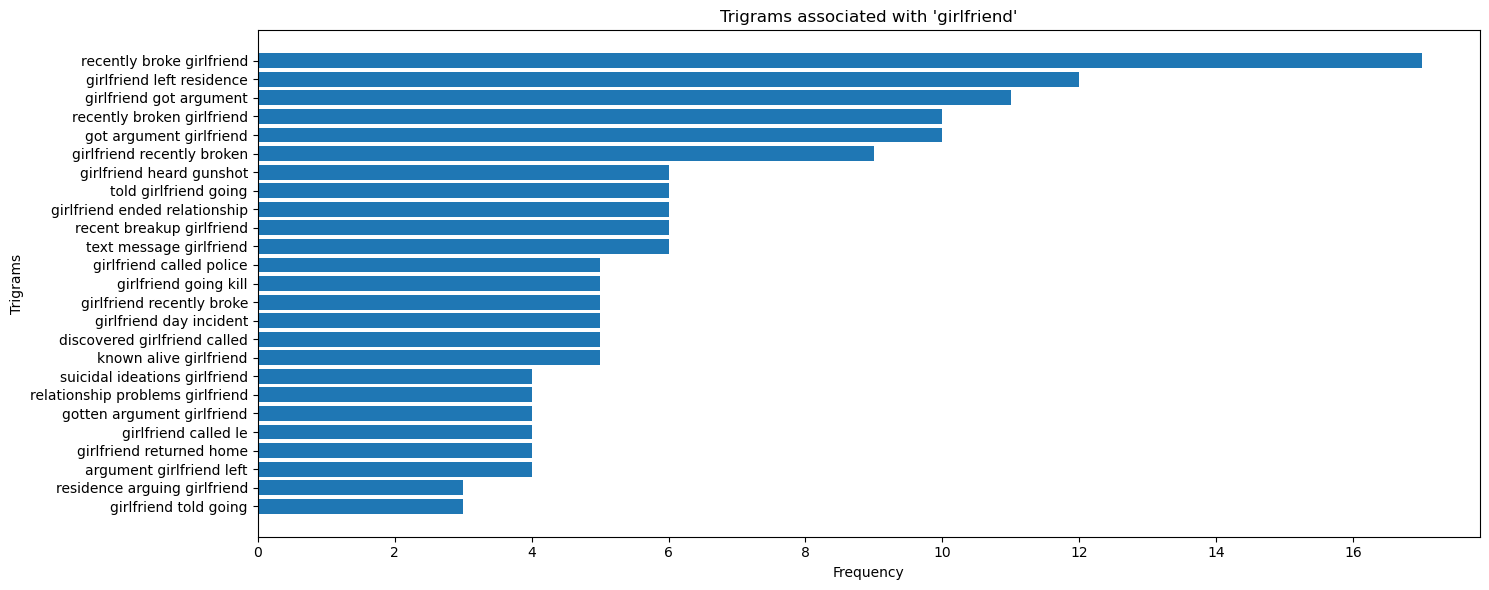

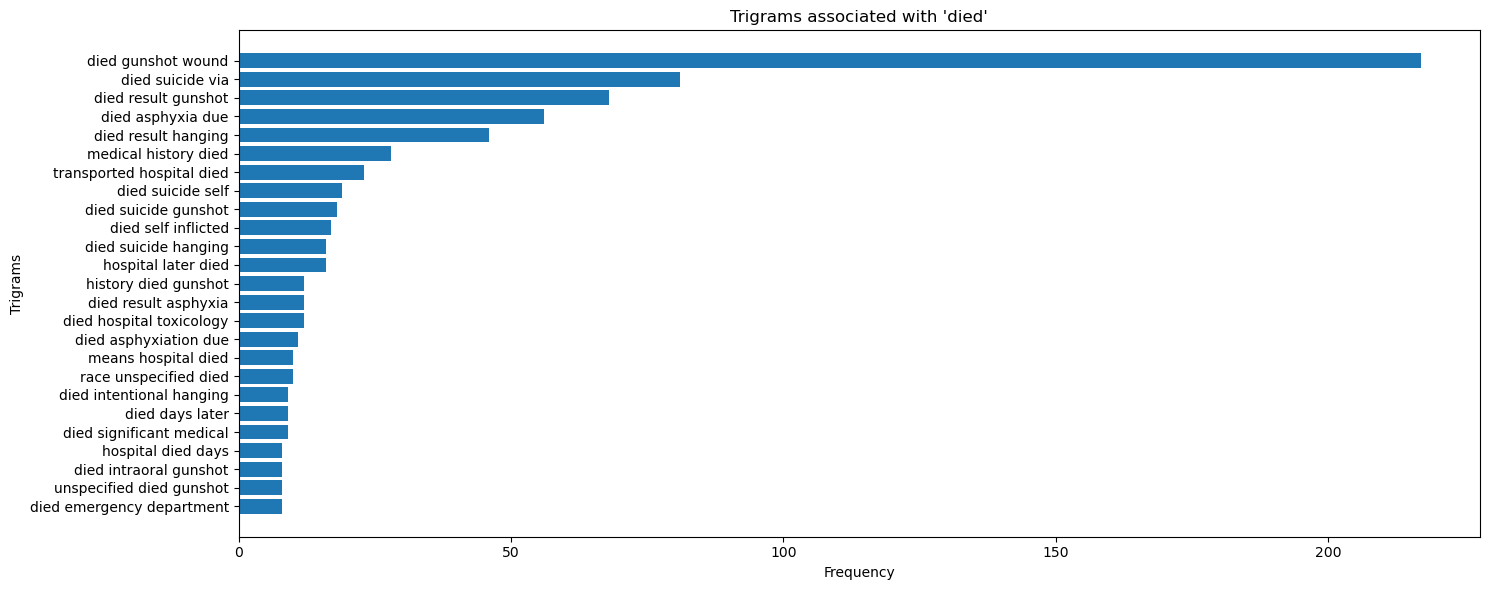

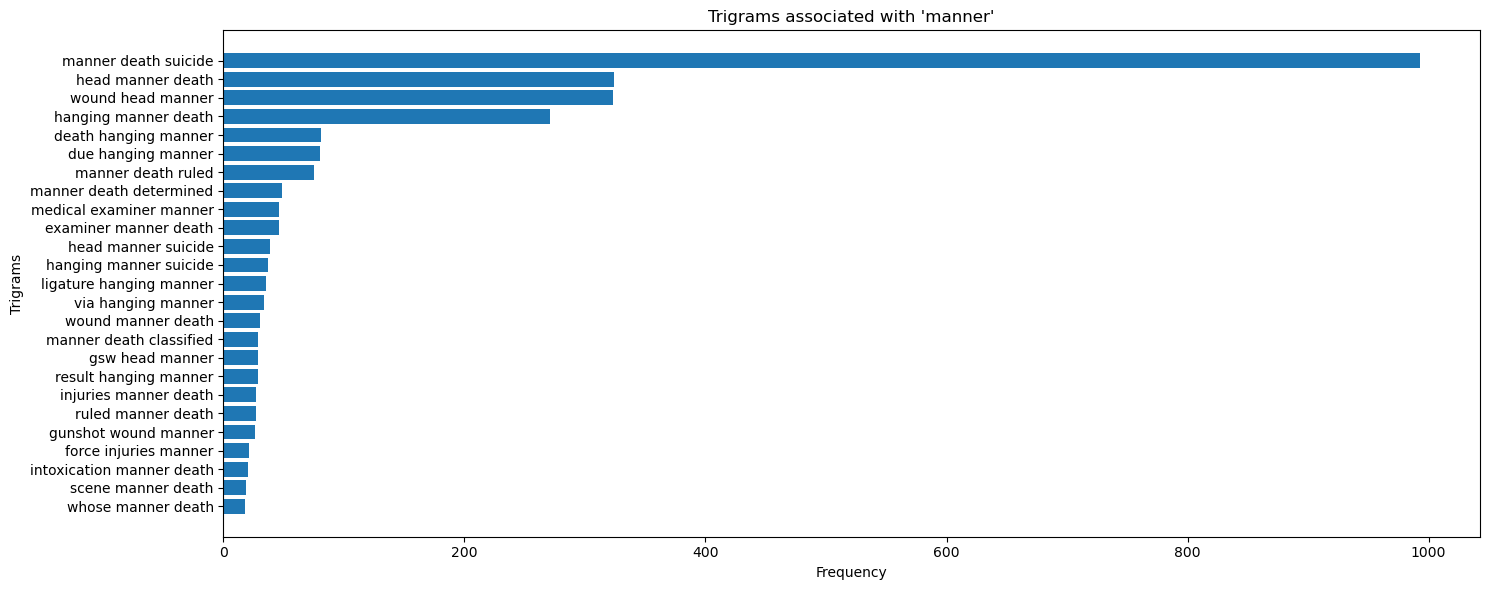

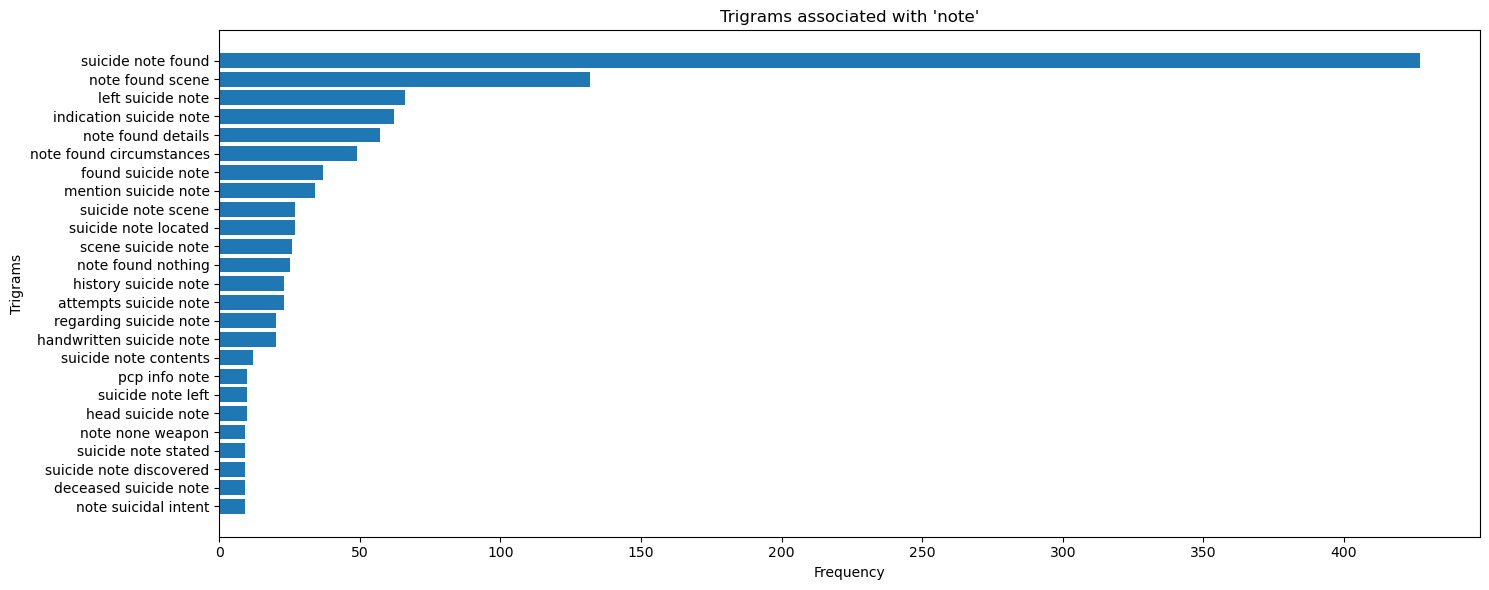

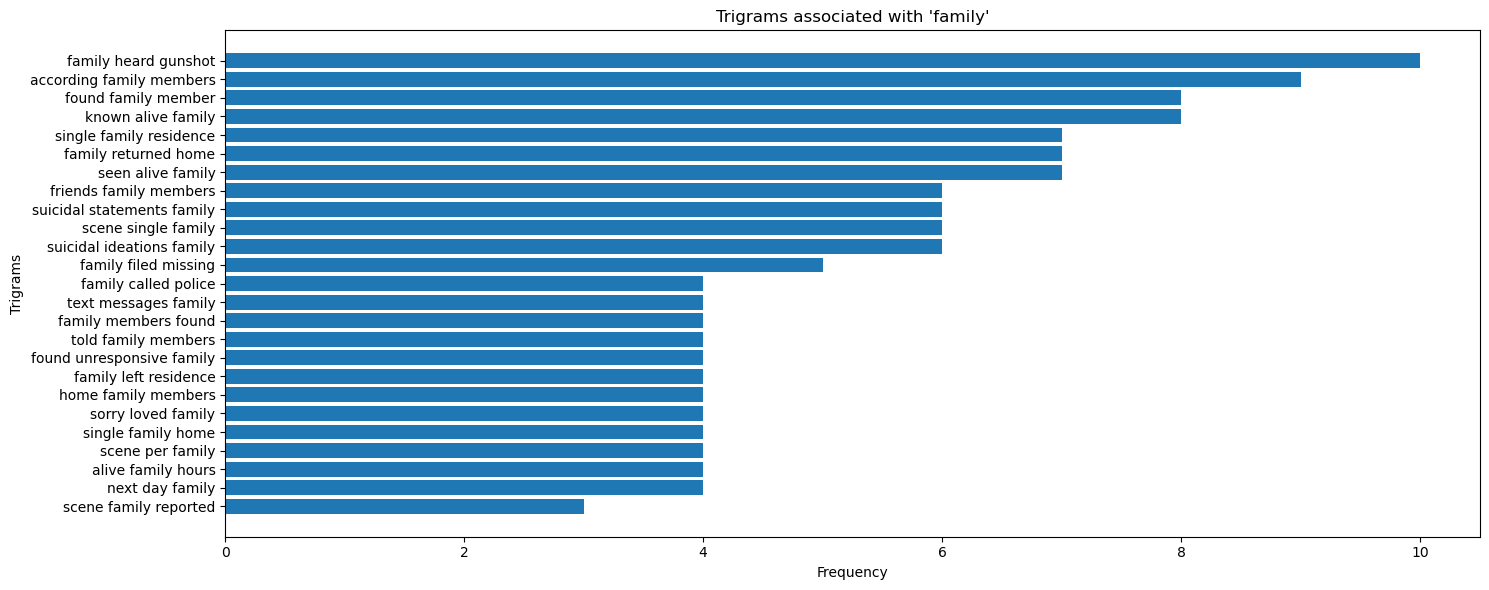

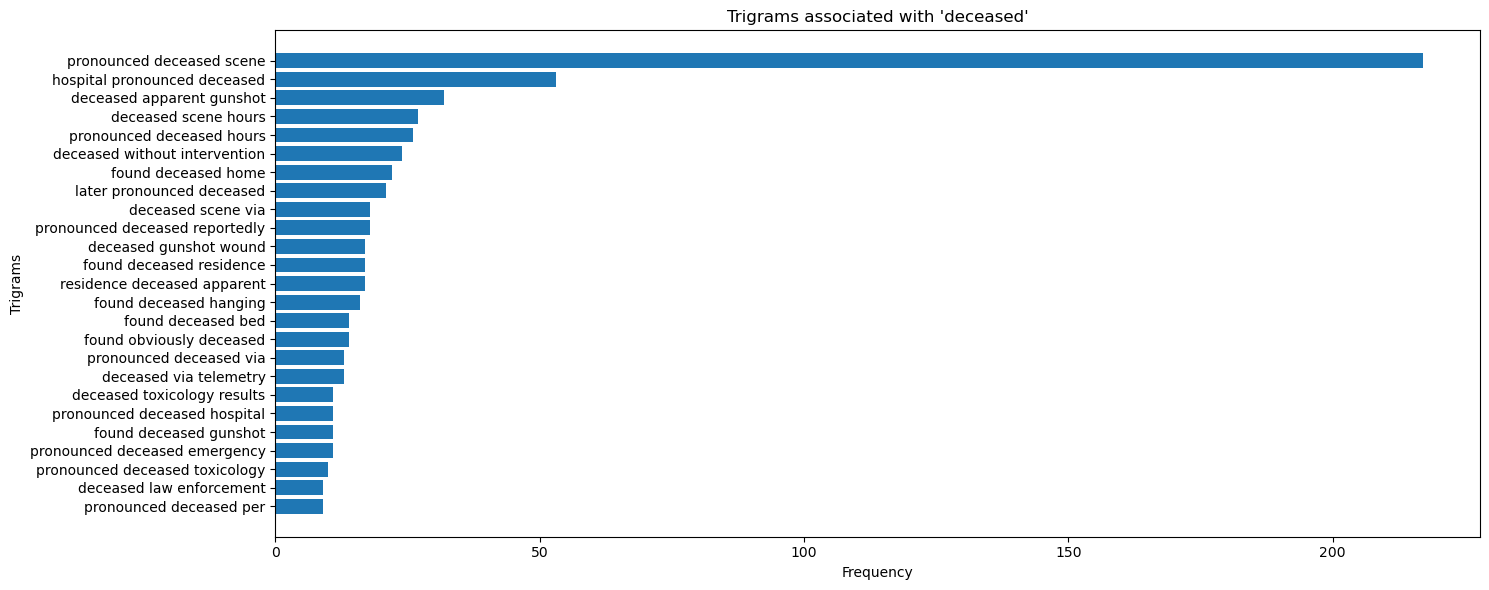

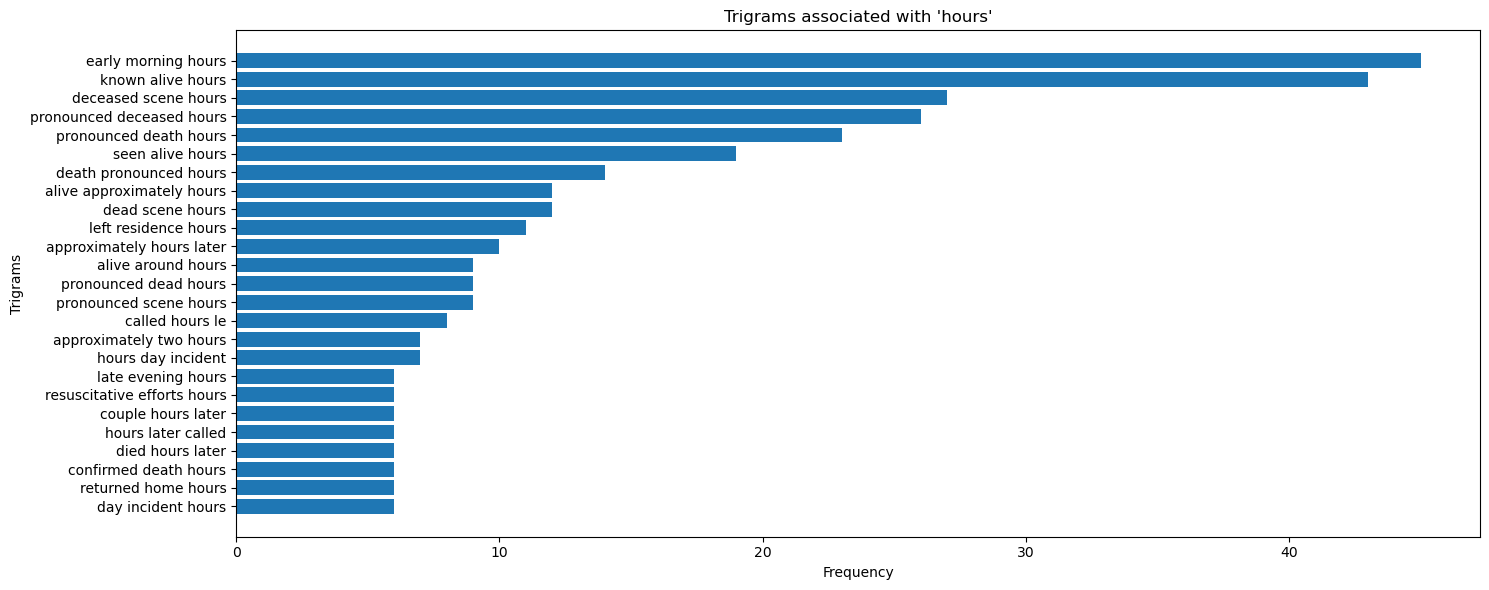

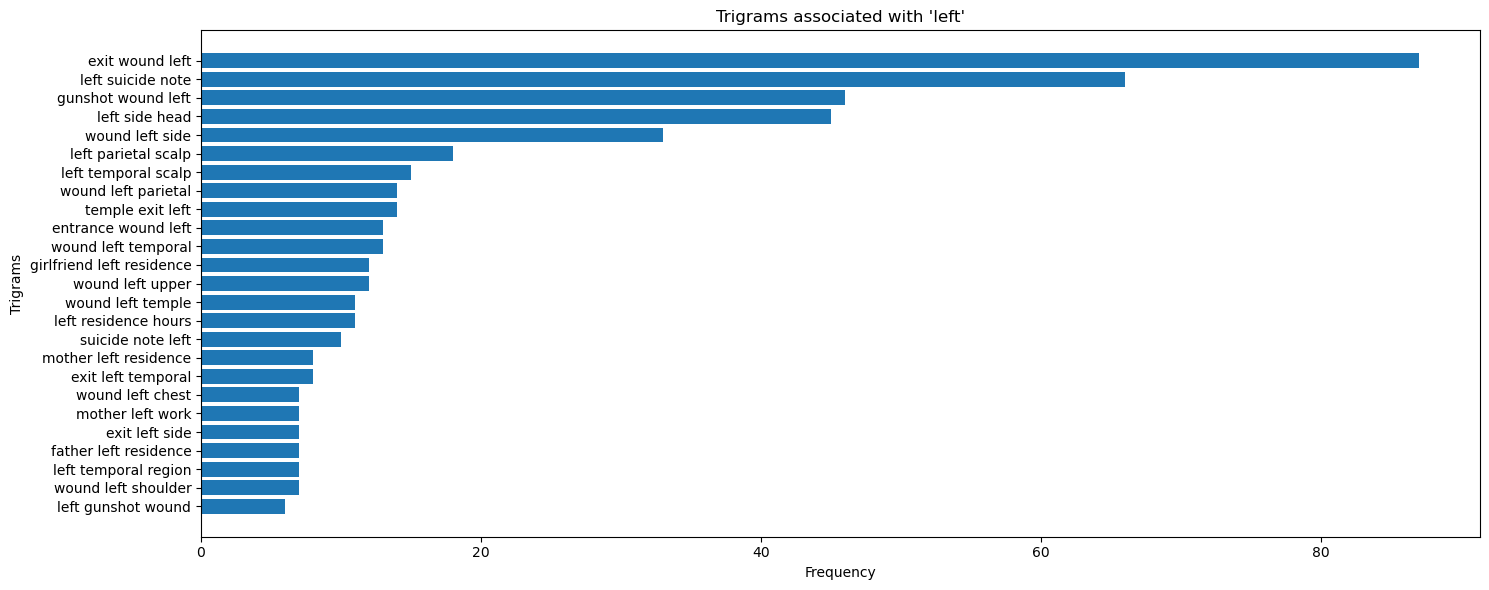

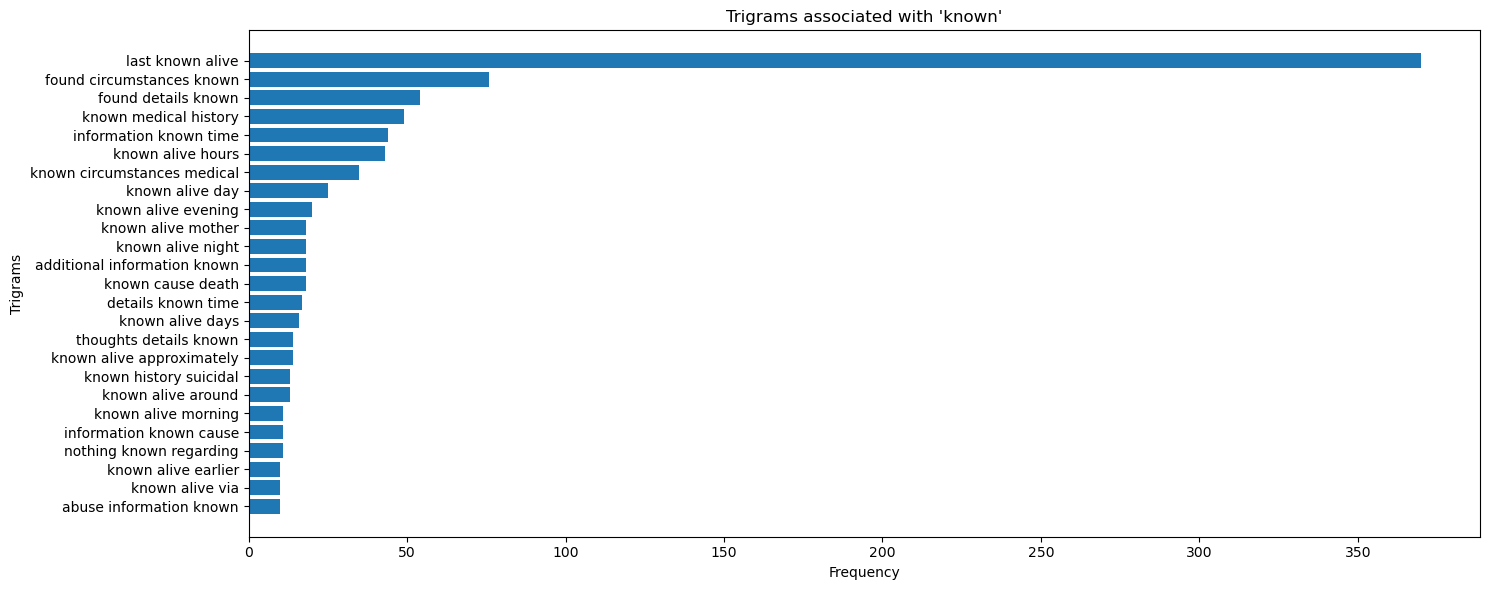

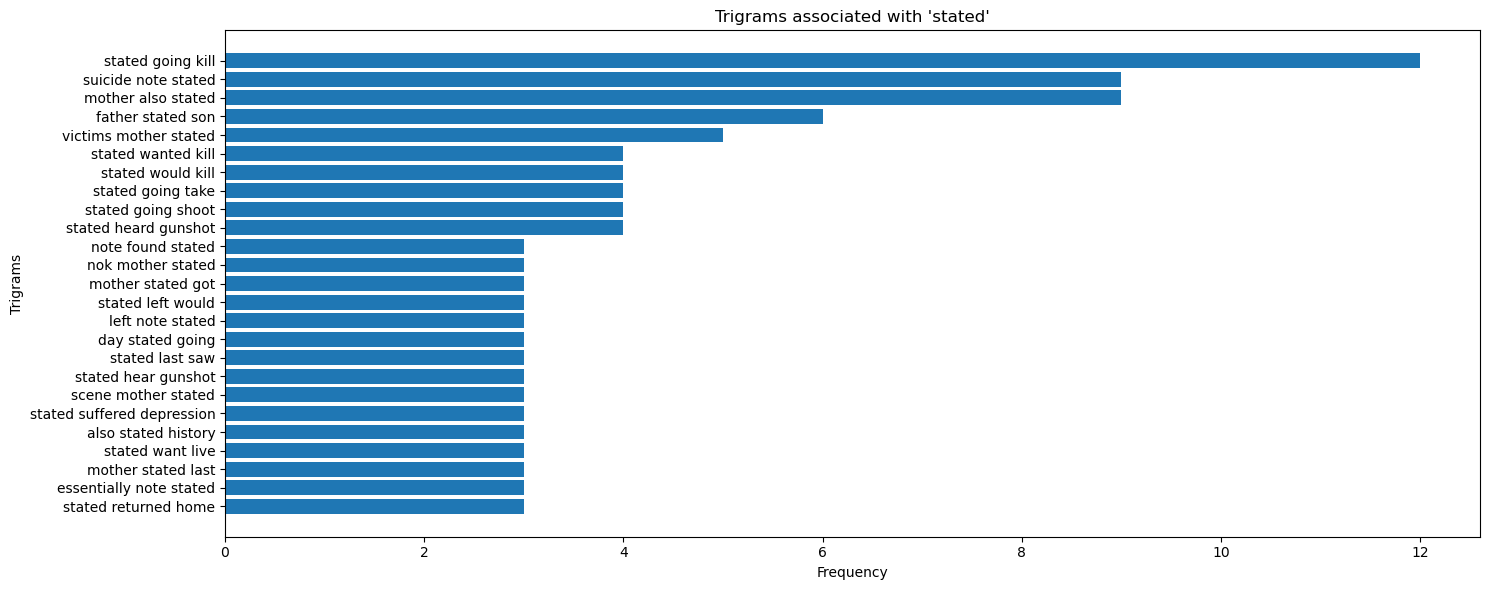

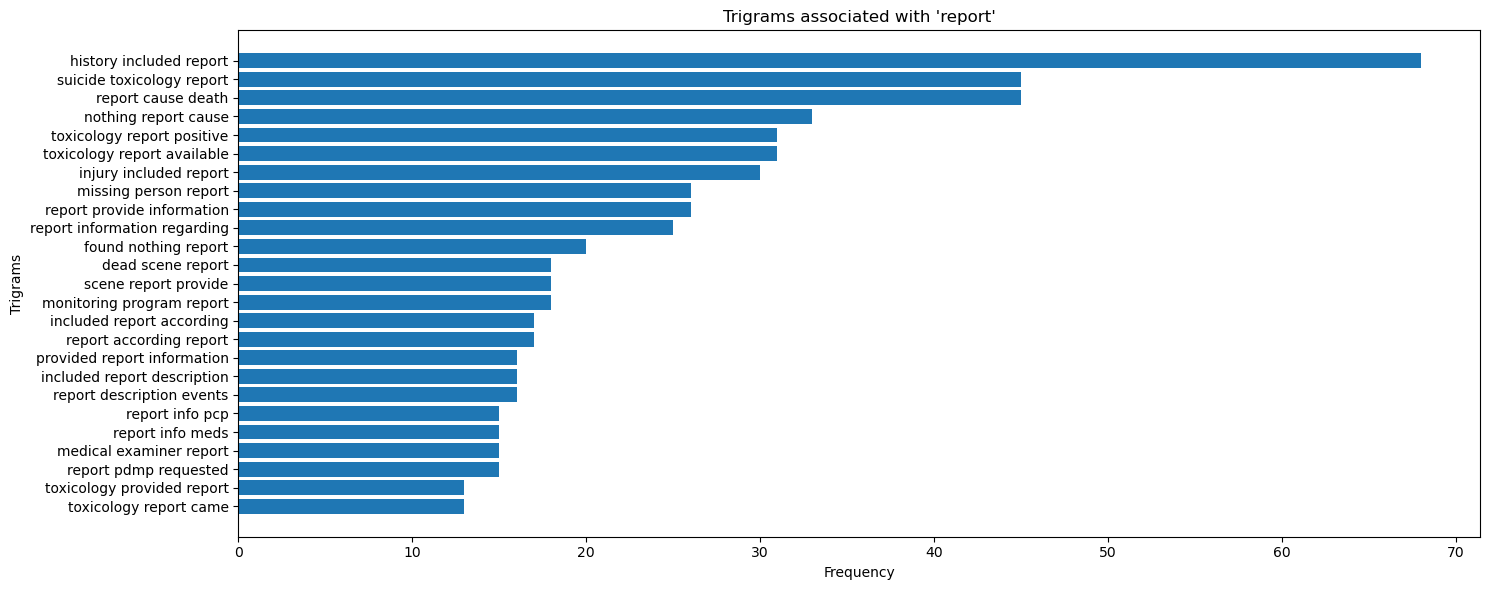

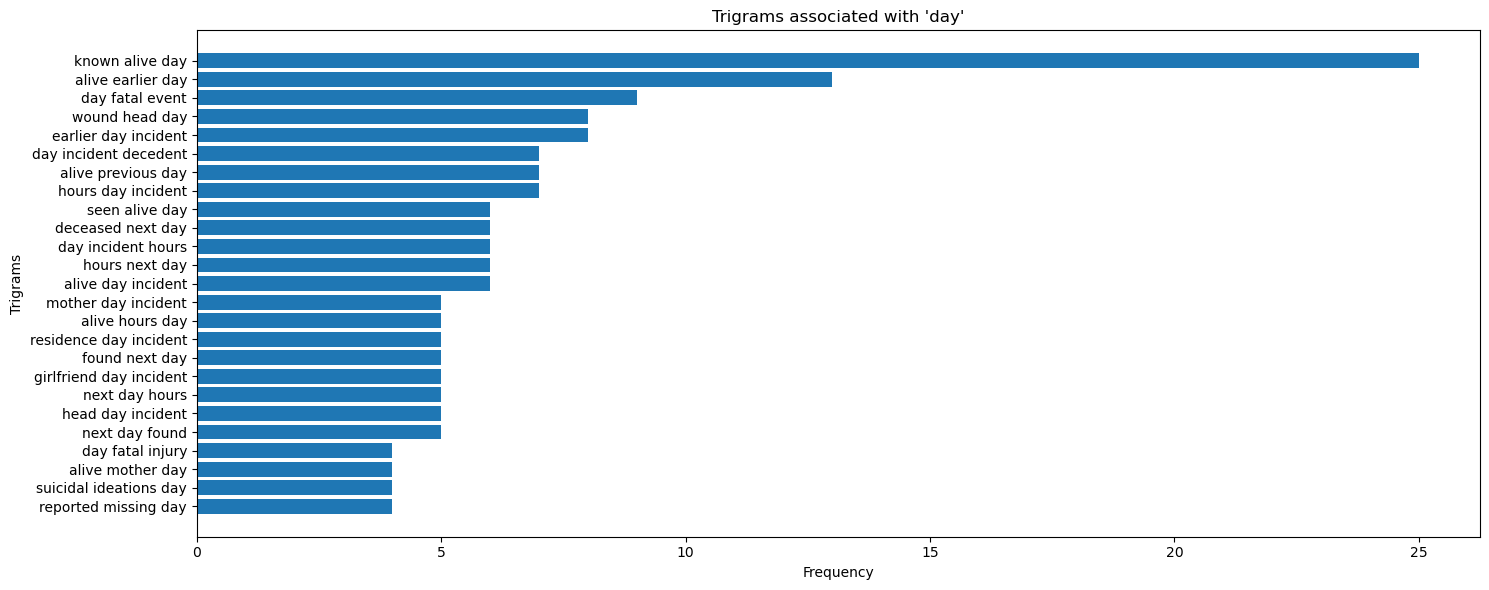

In [59]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams

# Load the CSV file
df = pd.read_csv('data/train_features.csv')

# Assuming 'text' is the column with the text data
text = df['NarrativeCME'].astype(str)

# Tokenization
tokens = text.apply(word_tokenize)

# Convert to lowercase
tokens = tokens.apply(lambda x: [w.lower() for w in x])

# Remove punctuation and non-alphabetic tokens
tokens = tokens.apply(lambda x: [word for word in x if word.isalpha()])

# Filter out stop words
stop_words = set(stopwords.words('english'))
tokens = tokens.apply(lambda x: [w for w in x if not w in stop_words])

# Join tokens back into strings
text = tokens.apply(lambda x: ' '.join(x))

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the vectorizer on the text data
X = vectorizer.fit_transform(text)

# Convert the matrix to a DataFrame
co_occurrence_matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Get the top 35 most common words
top_words = co_occurrence_matrix.sum().sort_values(ascending=False).head(35).index

# Exclude certain words from the top words list
exclude_words = ["v", "xx", "victim", "prior", "ems"]
top_words = [word for word in top_words if word not in exclude_words]

# Loop through each word in the top_words array
for chosen_word in top_words:
    # Extract trigrams from the text data that contain the chosen word
    trigrams = [trigram for trigram in ngrams(text.str.cat(sep=' ').split(), 3) if chosen_word in trigram]

    # Calculate the frequency of each trigram
    trigram_freq = Counter(trigrams)

    # Exclude certain words from the trigrams
    trigram_freq = {trigram: freq for trigram, freq in trigram_freq.items() if all(word not in trigram for word in exclude_words)}

    # Sort the trigram frequency in descending order and select the top 25 trigrams
    top_trigrams = dict(sorted(trigram_freq.items(), key=lambda item: item[1], reverse=True)[:25])

    # Convert the tuples to strings
    top_trigrams = {f"{trigram[0]} {trigram[1]} {trigram[2]}": freq for trigram, freq in top_trigrams.items()}

    # Create a horizontal bar graph
    plt.figure(figsize=(15, 6))  # Create a new figure for each word
    plt.barh(list(top_trigrams.keys()), list(top_trigrams.values()))  # Horizontal bar chart
    plt.title(f"Trigrams associated with '{chosen_word}'")
    plt.xlabel("Frequency")
    plt.ylabel("Trigrams")
    plt.grid(False)  # Disable the grid lines
    plt.gca().invert_yaxis()  # Invert the Y-axis for descending order
    plt.tight_layout()

    # Show the plot
    plt.show()
